<a href="https://colab.research.google.com/github/mahdi13830510/TensorFlow_NLP/blob/main/Getting_Started_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
import numpy as np

Most recipes will folllow this outline:

1- **Import or generate datasets:** All of our machine-learining algorithms will depend on datasets. In this book, we will either generate data or use an outside source of datasets. Sometimes it is better to rely on generated data because we wil just want to know the expected outcome. Most of the time, we will access public datasets for given recipe and the details.

2- **Transform and normalize data:** Normally, input datasets do not come in the shape TensorFlow would expect so we need to transform TensorFlow them to the accepted shape. The data is usually not in the correct dimension or type that our algorithms expect. We will have to transform our data before we can use it. Most algorithms also expect normalized data and we will do this here as well. TensorFlow has built-in functions that can nomalize the data for you as follow:

*data = tr.nn.batch_norm_with_global_normalization(...)*

3- **Partition datasets into train, test, and validation sets:** We generally want to test our algorithms on different sets that we have trained on. Also, many algorithms require hyperparameter tuning, so we set aside a validation set for determining the best set of hyperparameters.

3- **Set algorithms parameters(hyperparameters):** Our algorithms usually have a set of parameters that we hold constant throughout the procedure. For example, this can be the number of iterations, the learning rate, other fixed parameters of our choosing. It is considered good form to initialize these together so the reader or user can easily find them, as follows:

*learning_rate = 0.01*

*batch_size = 100*

*iterations = 1000*

5- **Initialize variables and placeholders:** TensorFlow depends on knowing what it can and cannot modify. TensorFlow will modify/adjust the variables and weight/bias during optimization to minimize a *loss* function. To accomplish this, we feed in data through placeholders. We need to initialize both of these variables and placeholders with size and type, so that TensorFlow knows what to expect. TensorFlow also needs to know the type of data to expect: for most of this book, we will use *float32*. TensorFlow also provides *float64* and *float16*. Note that the more bytes used for precision results in slower algorithms, but the less we use results in less precision. See the following code:

*a_var = tf.constant(42)*

*x_input = tf.placeholder(tf.float32, [None, input_size])*

*y_input = tf.placeholder(tf.float32, [None, num_classes])*

6- **Define the model structure:** After we have the data, and have initialized our variables and placeholders, we have to define the model. This is done by building a computational graph. TensorFlow chooses what operations and values must be teh variables and placeholders to arrive at our model outcomes. Our model for this example will be a linear model:

*y_pred = tf.add(tf.mul(x_input, weight_matrix), b_matrix)*

7- **Declare the loss function:** After defining the model, we must be able to evaluate the output. This is where we declare the *loss* function. The *loss* function is very important as it tells us how far off our predeictions are from the actual values. for example:

*loss = tf.reduce_mean(tf.square(y_actual - y_pred))*

8- ** Initialize and train the model:** Now that we have everything in place, we need to create an isntance of our graph, feed in the data through the placeholders, and let TensorFlow change the variables to better predict our training data. Here is one way to initialize the computational graph:


*with tf.session(graph=graph) as session:*
> *...*

> *session.run(...)*

> *...*

Note that we can also initiate our graph with:

*session = tf.Session(graph=graph)*

*session.run(...)*

9- **Evaluate the model:** Oncee we have built and trained the model, we should evaluate the model by looking at how well it does with new data through some specified criteria. We evaluate on the train and test set and these evaluations will allow us to see if the model id underfit or overfit. We will address these in later recipes.

10- **Tune hyperparameters:** Most of the times, we will want to go back and change some of the hyperparameters, based on the model performance. We then repeat the previous steps with diffrent hyperparameters and evaluate the model on the validation set.

11_ **Deploy/predict new outcomes:** It is also important to know how to make predictions on new. unseen, data. We can do this with all of our models, once we have them trained.


# Declaring Tensors

Tensors are the primary data structure that TensorFlow uses to operate on the computational graph. We can declare these tensors as variables and or feed them in as placeholders. First we must know how to create tensors.
When we create a tensor and declare it to be a variable, TensorFlow creates several graph structures in our computation graph. It is also important to point out that just by creating a tensor, TensorFlow is not adding anything to the computational graph.

Here we will cover the main ways to create tensors in TensorFlow:

##1- Fixed tensors:

In [3]:
# Create a zero filled tensor. Use the following:
zero_tsr = tf.zeros([2, 2])
print(zero_tsr)

tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [4]:
# Create a one filled tensor. Use the following:
ones_tsr = tf.ones([2, 2])
print(ones_tsr)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [5]:
# Create a constant filled tensor. Use the following:
filled_tsr = tf.fill([2, 2], 42)
print(filled_tsr)

tf.Tensor(
[[42 42]
 [42 42]], shape=(2, 2), dtype=int32)


In [6]:
# Create a tensor out of an existing constant. Use the following:
constant_tsr = tf.constant([1, 2, 3])
print(constant_tsr)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)



Note
---
Note that the *tf.constant()* function can be used to broadcast a value into an array, mimicking the bahavior of *tf.fill()* by writing *tf.constant(42, [row_dim, col_dim])*

##2- Tensors of similar shape:

In [8]:
# We can also initialize variables based on the shape of other tensors:
zeros_similar = tf.zeros_like(constant_tsr)
ones_similar = tf.ones_like(constant_tsr)
print(f"zeros_similar: {zeros_similar}\n" +
      f"ones_similar: {ones_similar}")

zeros_similar: [0 0 0]
ones_similar: [1 1 1]



Note
---
Note, that since these tensors depend on prior tensors, we must initialize them in oreder. Attempting to initialize all the tensors all at once willwould result in an error

##3- Sequence tensors:

In [15]:
"""
TensorFlow allows us to specify tensors that contain defined intervals.
The folloing functions bahave very similarly to the range() outputs and
numpy's linespace() outputs. See the following function:
"""
linear_tsr = tf.linspace(0, 1, 3)
print(linear_tsr)

tf.Tensor([0.  0.5 1. ], shape=(3,), dtype=float64)


In [16]:
"""
Note that this function includes the specfified stop value. See the
following function:
"""
integer_seq_tsr = tf.range(start=6, limit=15, delta=3)
print(integer_seq_tsr)
# Note that this function does not include the limit value

tf.Tensor([ 6  9 12], shape=(3,), dtype=int32)


##4- Random tensors:

In [21]:
"""
Note that this random uniform distribution draws from the interval
that includes the minval but not the maxval
(minval <= x < maxval)
"""
# The following generatedd random numbers are from a unifrom distribution:
randunif_tsr = tf.random.uniform([2, 2], minval=0, maxval=1)
print(randunif_tsr)

tf.Tensor(
[[0.3221202  0.07705283]
 [0.5458449  0.8150064 ]], shape=(2, 2), dtype=float32)


In [22]:
# To get a tensor with random draws from a normal distribution, as follows:
randnorm_tsr = tf.random.normal([2, 2], mean=0.0, stddev=1.0)
print(randnorm_tsr)

tf.Tensor(
[[-0.3281341  -1.2613165 ]
 [-0.41676232  0.5077727 ]], shape=(2, 2), dtype=float32)


In [25]:
"""
There are also times when we wish to generate normal random values
that are assured within certain bounds.
The truncated_normal() function always picks normal values within
two standard deviations of the specified mean. See following :
"""
runcnorm_tsr = tf.random.truncated_normal([2, 2], mean=0.0, stddev=1.0)
print(runcnorm_tsr)

tf.Tensor(
[[-0.5959731  -0.19434686]
 [ 0.70934916  1.0583062 ]], shape=(2, 2), dtype=float32)


In [32]:
"""
We might also be interested in randomizing entries of arrays.
To accomplish this, there are one functions that help us:
random_shuffle() See as following:
"""
shuffled_output = tf.random.shuffle(runcnorm_tsr)
print(shuffled_output)


tf.Tensor(
[[-0.5959731  -0.19434686]
 [ 0.70934916  1.0583062 ]], shape=(2, 2), dtype=float32)


Once we have decided on how to create the tensors, then we may also create the correspondeing variables by wrapping the tensor in the *Variable()* function, as follows:

*my_var = tf.Variable(tf.zeros([row_dim, col_dim]))*

We are not limited to the built_in functions. We can convert any *numpy* array to a Python list, or constant to a tensor using the function *convert_to_tensor()* . Note that this function also accepts tensors as an input in case we wish to generalize a computation inside a function.

# Using Placeholders and Variables
Placeholders and variables are key tools for using computational graphs in TensorFlow. We must understand the difference and when to best use them to our advantage.

One of the most important distinctions to make with the data is whether it is a placeholder or a variable. Variables are the parameters of the algorithm and TensorFlow keeps track of how to change these to optimize the algorithms. Placeholders are objects that allow you to feed in data of a specific type and shape and depend on the results of the computational graph, such as the expected outcome of a computation.

The main way to create a vairable is by using *Variable()* function, which takes a tensor as an input and outputs a variable. This is the declaration and we still need to initialize the variable. Initializing is what puts the varaible with the corresponding methods on the computational graph. Here is an example of creating and initializing a variable:

In [39]:
my_var = tf.Variable(tf.zeros([2, 3]))
sess = tf.compat.v1.Session()
initialize_op = tf.compat.v1.global_variables_initializer()
sess.run(initialize_op)


Placeholders are just holding the position for data to be fed into the graph. Placeholders get data from *feed_dict* argument in the session. To put a placeholder in the graph, we must perform at least one operation on the placeholder. We initialize the graph, declare *x* to be a placeholder, and define *y* as the identity operation on *x*, which just returns *x*. We then create data to feed into the *x* placeholder and run the identity operation. It is worth noting that TensorFlow will not return a self-referenced placeholder in the feed dictionary. The code is shown here and the resulting graph is shwon in the next session:

In [42]:
sess = tf.compat.v1.Session()
x = tf.compat.v1.placeholder(tf.float32, shape=[2, 2])
y = tf.identity(x)
x_vals = np.random.rand(2, 2)
sess.run(y, feed_dict={x: x_vals})
# Note that sess.run(x, feed_dict={x: x_vals}) will result in a self-referencing error

array([[0.04594006, 0.85711676],
       [0.67188704, 0.5033806 ]], dtype=float32)

The computational graph of initializing a variable as a tensor of zeros is shown in the following figure:
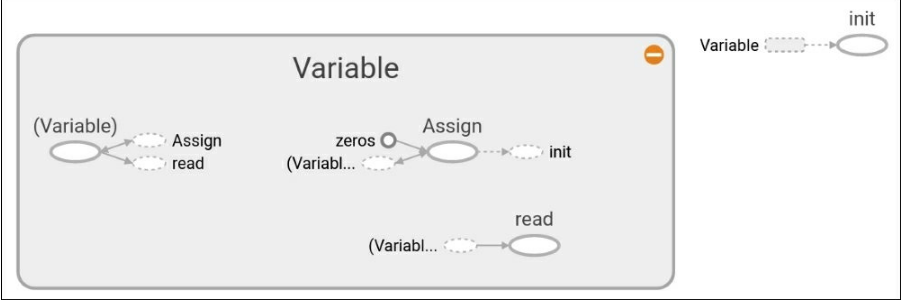
